In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atividade 4

Considere o conjunto de dados abaixo, que mostra dados de consumo de diferentes <br>
produtos alimentícios nos 4 países do Reino Unido. Responda às seguintes perguntas<br>


Leitura dos dados

In [2]:
dados = pd.read_csv('../data/exc4.csv')

In [3]:
dados.head()

,Food,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209


## Item (a)
(a)   Apresente uma matriz de correlação entre os países. (informe o método utilizado para calcular a correlação).

In [4]:
dados_paises = dados.iloc[:, 1:]

In [5]:
dados_paises.head()

,England,Wales,Scotland,N Ireland
0,105,103,103,66
1,245,227,242,267
2,685,803,750,586
3,147,160,122,93
4,193,235,184,209


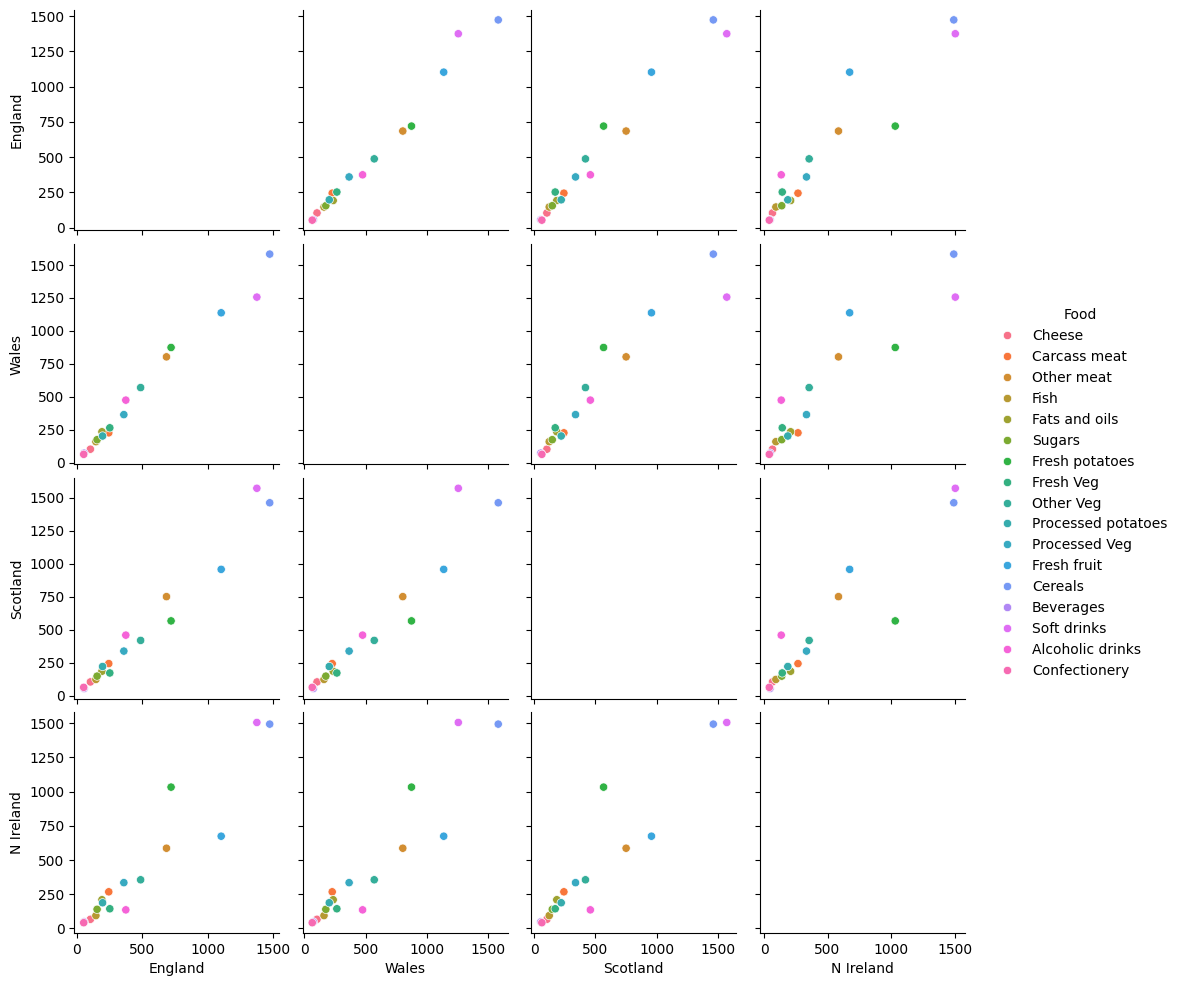

In [6]:
p = sns.pairplot(dados, hue='Food')
#p.figure.set_size_inches(6,6)

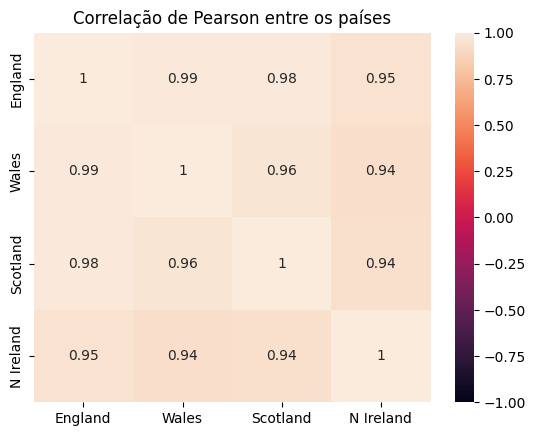

In [7]:
p = sns.heatmap(dados_paises.corr(), annot=True, vmin=-1, vmax=1)
p.set_title('Correlação de Pearson entre os países')
plt.show()

## Item (c)

Aplique o PCA para obter os componentes principais, e mostre o gráfico PC1 x PC2 (chamado score plot)

In [8]:
dados.head()

,Food,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209


In [9]:
dados_food = dados[['Food']].copy()

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Food       17 non-null     object
 1   England    17 non-null     int64 
 2   Wales      17 non-null     int64 
 3   Scotland   17 non-null     int64 
 4   N Ireland  17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 812.0+ bytes


In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=4)

In [13]:
dados_pca = pca.fit_transform(dados_paises)

In [14]:
dados_food['pca1'] = dados_pca[:,0]
dados_food['pca2'] = dados_pca[:,1]

Text(0, 0.5, 'PCA 2')

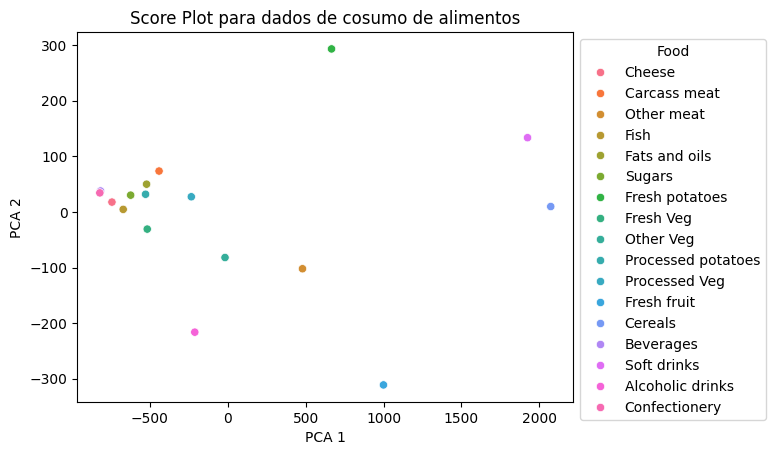

In [17]:
p = sns.scatterplot(dados_food, x='pca1', y='pca2', hue='Food')
p.set_title('')
#p.figure.set_size_inches(10,10)
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1))
p.set_title('Score Plot para dados de cosumo de alimentos')
p.set_xlabel('PCA 1')
p.set_ylabel('PCA 2')
#plt.tight_layout()

Text(0.5, 1.0, 'Variância explicada pelas duas componentes: 99.00%')

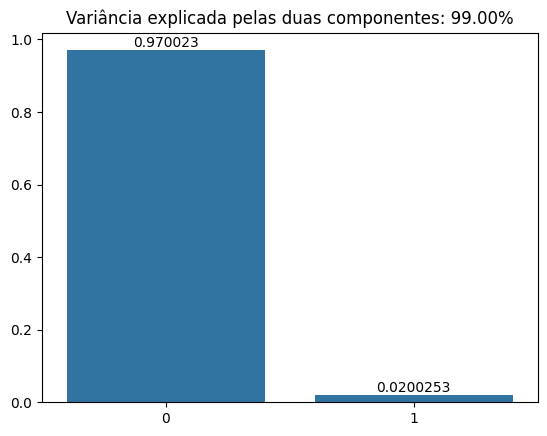

In [ ]:
ax = sns.barplot(pca.explained_variance_ratio_)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title(f'Variância explicada pelas duas componentes: {pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]:.2%}')

In [18]:
from scipy.spatial import distance_matrix

In [29]:
dados_paises

,England,Wales,Scotland,N Ireland
0,105,103,103,66
1,245,227,242,267
2,685,803,750,586
3,147,160,122,93
4,193,235,184,209
5,156,175,147,139
6,720,874,566,1033
7,253,265,171,143
8,488,570,418,355
9,198,203,220,187


In [36]:
distance_matrix(dados_paises, dados_paises)[12,:]

array([2818.19002198, 2517.03853765, 1599.25545176, 2745.19762494,
       2595.14142197, 2697.54610711, 1442.95010309, 2590.8168596 ,
       2092.76300617, 2602.98482516, 2308.43193532, 1123.54350161,
          0.        , 2891.08906815,  357.94412972, 2298.64199039,
       2895.90348596])

Text(0.5, 1.0, 'Mapa de Calor para matriz de distâncias entre as comida')

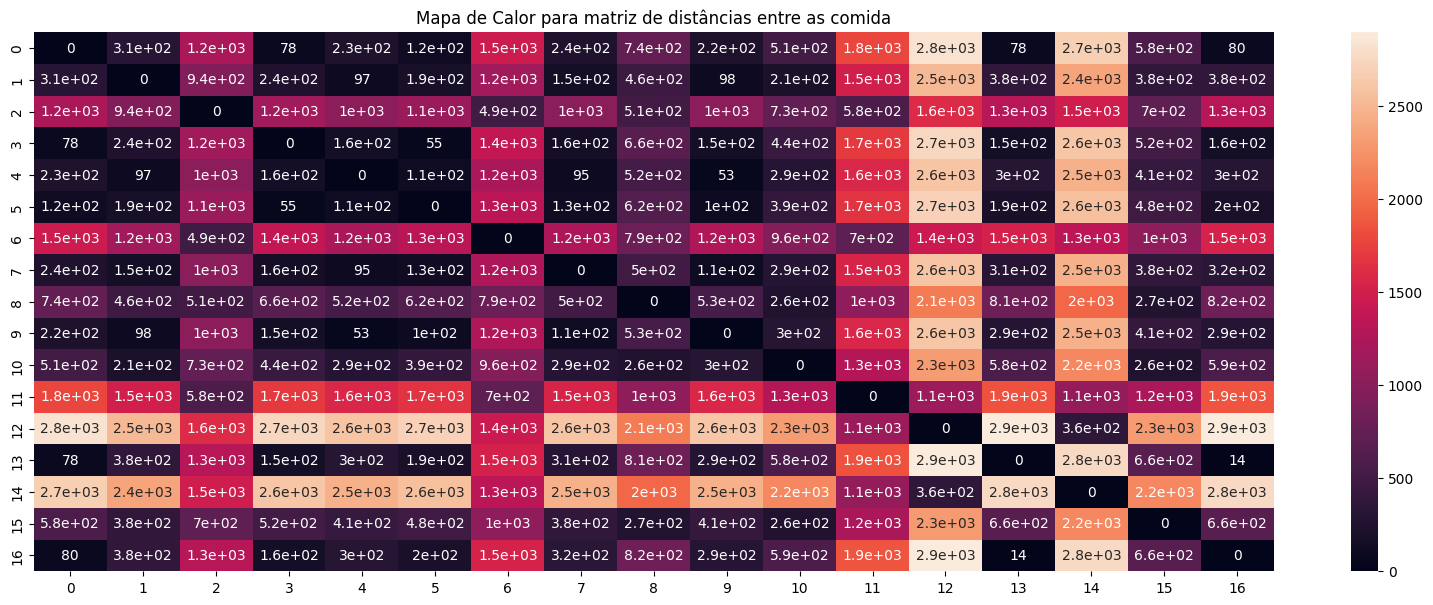

In [32]:
p = sns.heatmap(distance_matrix(dados_paises, dados_paises), annot=True)
p.figure.set_size_inches(20,7)
p.set_title('Mapa de Calor para matriz de distâncias entre as comidas')

In [41]:
print(dados['Food'][12])
print(dados['Food'][13])

Cereals
Beverages


In [48]:
from sklearn.metrics.pairwise import cosine_similarity

<Axes: >

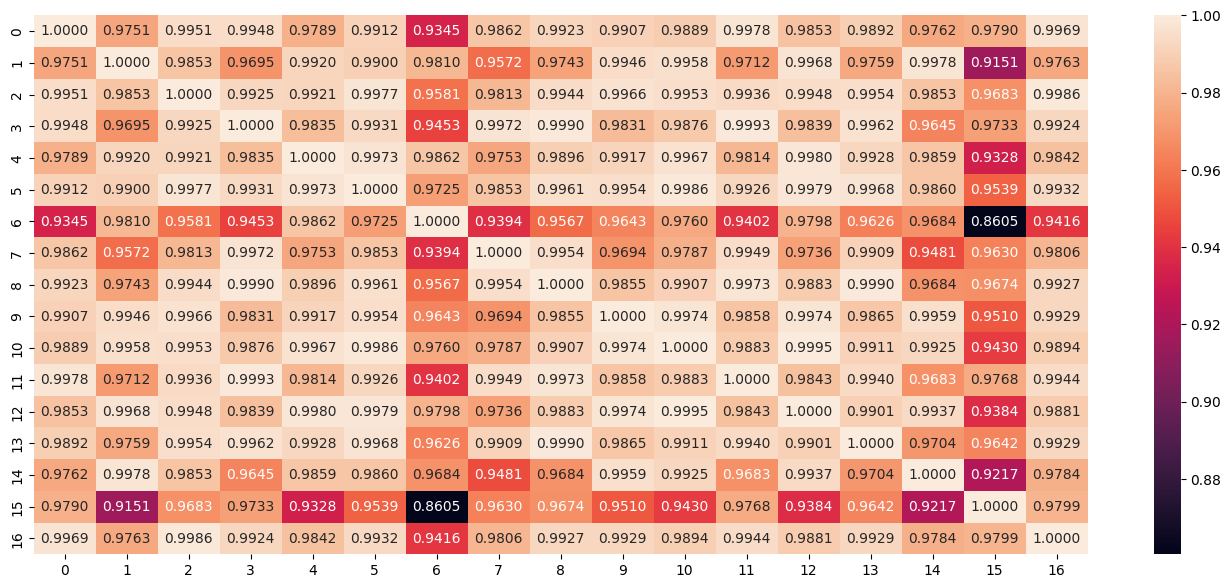

In [70]:
fig, ax = plt.subplots(figsize=(17,7))
sns.heatmap(cosine_similarity(dados_paises), annot=True, ax=ax, fmt='.4f')

In [72]:
print(dados['Food'][12])
print(dados['Food'][10])

Cereals
Processed Veg
